In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn
import sys
import importlib

In [43]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override() 

In [2]:
sys.path.extend(['C:\\Users\\fredf\\PycharmProjects\\visualization-tools', 'C:/Users/fredf/PycharmProjects/visualization-tools'])
import viz

In [3]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 100

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from fredapi import Fred # API specific to St. Louis FRED
import pandas_datareader as pdr  # all purpose API for FRED, World Bank, Fama-French, Quandl

seaborn.set()

C:\Users\fredf\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# FRED: St. Louis Federal Reserve

In [5]:
fred = Fred(api_key='d9df4b4c838dc516ae37611a72dec45a')

In [6]:
sp500_pdr = pdr.get_data_fred('sp500')

In [7]:
sp500_pdr.index.min()

Timestamp('2015-04-09 00:00:00')

In [8]:
sp500 = fred.get_series('SP500')

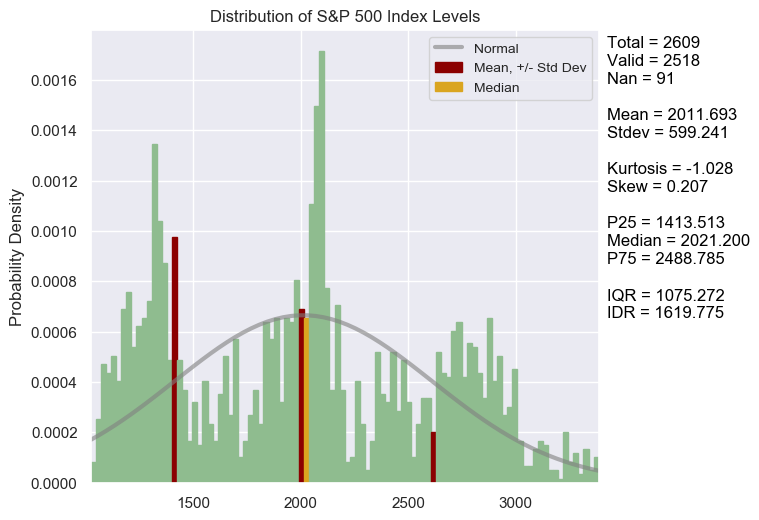

In [9]:
viz = importlib.reload(viz)
viz.histogram(sp500, title='Distribution of S&P 500 Index Levels', bins=100)

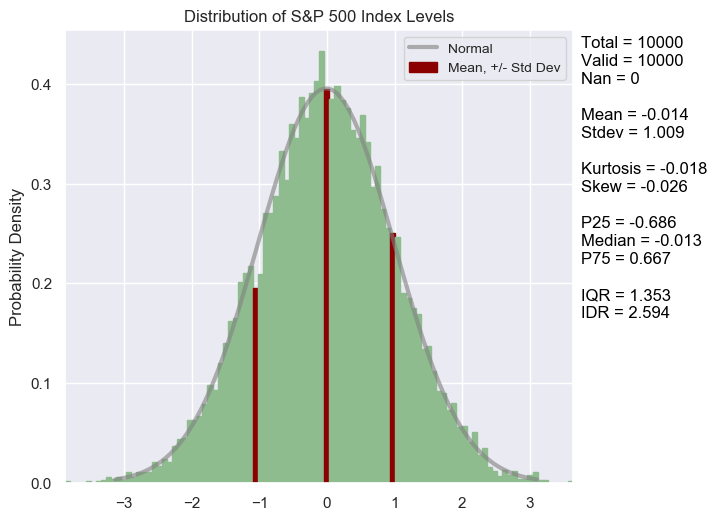

In [10]:
viz.histogram(np.random.normal(loc=0, scale=1.0, size=10000), title='Distribution of S&P 500 Index Levels', bins=100)

In [42]:
sp500.head()

2010-04-07    1182.45
2010-04-08    1186.44
2010-04-09    1194.37
2010-04-12    1196.48
2010-04-13    1197.30
dtype: float64

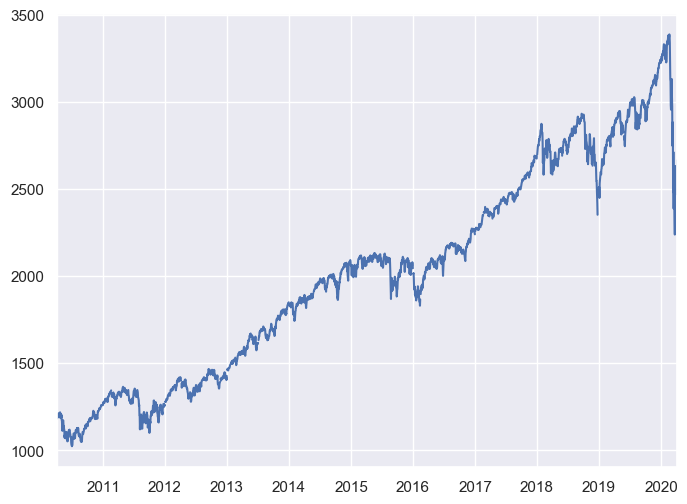

In [11]:
sp500.plot()
plt.show()

In [12]:
sp500.describe()

count    2518.000000
mean     2011.693467
std       599.359551
min      1022.580000
25%      1413.512500
50%      2021.200000
75%      2488.785000
max      3386.150000
dtype: float64

In [13]:
sp500.index.min()

Timestamp('2010-04-07 00:00:00')

# World Bank

In [14]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')

In [15]:
matches.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
646,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
9212,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9214,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9216,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'World Bank, International Comparison Program...",Economy & Growth
9217,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [16]:
matches.loc[9212]['sourceNote']

'GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2010 U.S. dollars.'

In [17]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'GB', 'CN', 'FR', 'DE'], start=1995, end=2019)
dat = dat.reset_index()
dat['year_end'] = pd.to_datetime(dat['year']) + pd.offsets.YearEnd(0)
dat = dat.rename(columns={'NY.GDP.PCAP.KD': 'GDP'})

In [18]:
ts = dat.pivot(index='year_end', columns='country', values='GDP').dropna(axis=0)
pd.set_option('precision', 2)
ts.head()

country,China,France,Germany,United Kingdom,United States
year_end,,,,,
1995-12-31,1224.85,33917.93,34783.29,30679.54,38369.16
1996-12-31,1332.42,34275.61,34967.48,31363.97,39356.09
1997-12-31,1440.59,34952.52,35539.13,32489.21,40614.41
1998-12-31,1538.66,36073.64,36251.19,33575.41,41942.71
1999-12-31,1642.36,37116.41,36913.19,34610.86,43434.69


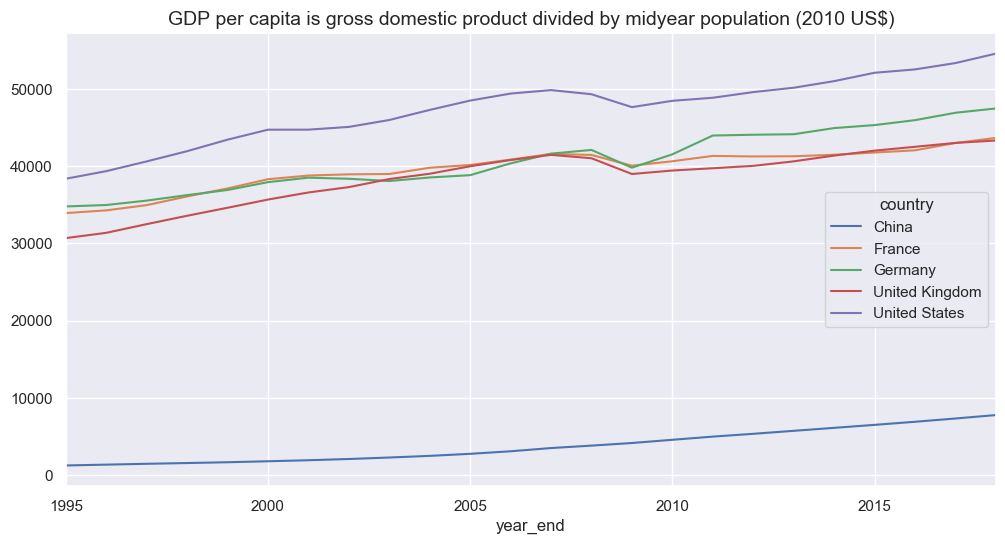

In [19]:
ts.plot(figsize=(12,6))
plt.title('GDP per capita is gross domestic product divided by midyear population (2010 US$)', fontsize=14)
plt.show()

In [20]:
ts.mean()

country
China              3746.15
France            39655.29
Germany           40705.01
United Kingdom    38497.24
United States     47372.04
dtype: float64

In [21]:
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])), index=['mouse', 'rabbit'], columns=['one', 'two', 'three'])
df

,one,two,three
mouse,1,2,3
rabbit,4,5,6


# VIX: Read CSV file from CBOE

In [22]:
link = r'http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixcurrent.csv'
df = pd.read_csv(link, skiprows=1)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.set_index('Date')
df = df.rename(columns={x: x.replace('VIX ', '') for x in df.columns})

In [23]:
df.head()

,Open,High,Low,Close
Date,,,,
2004-01-02,17.96,18.68,17.54,18.22
2004-01-05,18.45,18.49,17.44,17.49
2004-01-06,17.66,17.67,16.19,16.73
2004-01-07,16.72,16.75,15.50,15.50
2004-01-08,15.42,15.68,15.32,15.61


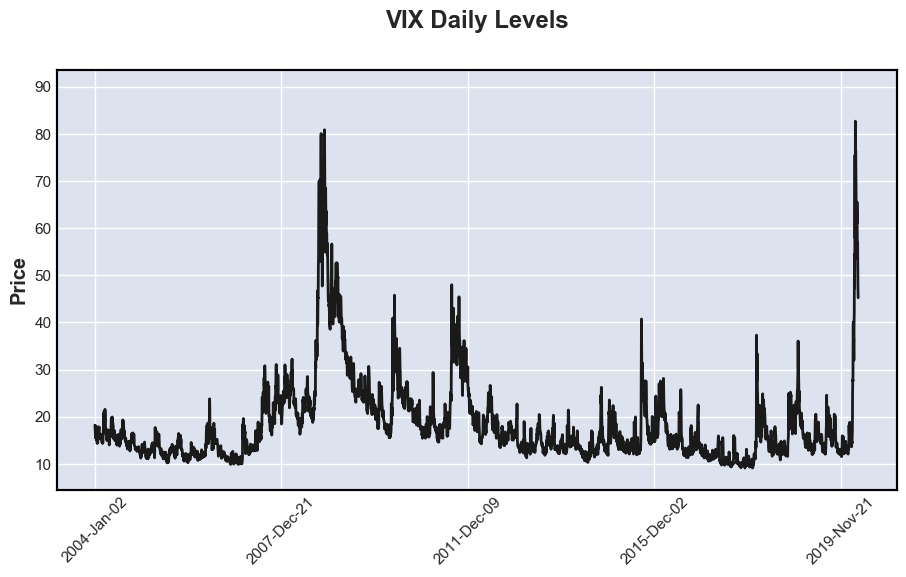

In [36]:
mpf.plot(df, type='line', figratio=(12,6), title='VIX Daily Levels')

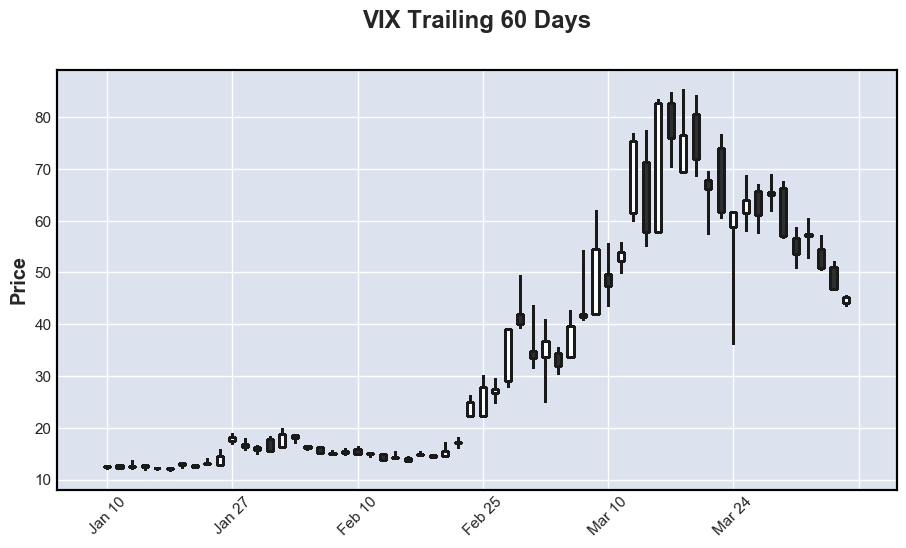

In [41]:
days = 60
mpf.plot(df[-days:], type='candle', figratio=(12,6), title='VIX Trailing ' + str(days) + ' Days')

In [48]:
from datetime import datetime as dt

In [49]:
dt.now()

datetime.datetime(2020, 4, 7, 13, 31, 21, 223291)

# SPY: State Street Global Advisors

In [ ]:
spy_loc = r'https://www.ssga.com/us/en/individual/etfs/library-content/products/fund-data/etfs/us/pdhist-us-en-spy.xlsx'

In [ ]:
df = pd.read_excel(spy_loc, skiprows=1)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.set_index('Date')
df = df.rename(columns={x: x.replace('VIX ', '') for x in df.columns})

In [50]:
7 % 2


1

In [51]:
7 % 10


7

In [52]:
6163 % 2

1

In [60]:
binary = '100100110'
int(binary, base=2)

294

In [75]:
26598 % 2

0

In [ ]:
dec = 294

In [118]:
def decimal_to_binary(x):
    """ Repeated Division by 2 Method. """
    
    
    binary = ''
    while x != 0:
        binary += str(int(x % 2))  # remainder is 0 or 1
        x = (x / 2) // 1  # get integer to left of decimal place
    return binary[::-1]  #  reverse string to get binary representation

In [128]:
decimal_to_binary(294.996)

100100110


In [117]:
decimal_to_binary(6163)

1100000010011


In [124]:
decimal_to_binary(5)

101


In [99]:
reverse('fred')

f
r
e
d


'fred'

In [102]:
s = 'fred'
s[::-1]

'derf'

In [ ]:
def div_by_2(x):
    for n in np.arange()